In [3]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

$\Large Bifurcation \ Diagram \ of \ x_t = x_{t-1} + r - x_{t-1}^2$

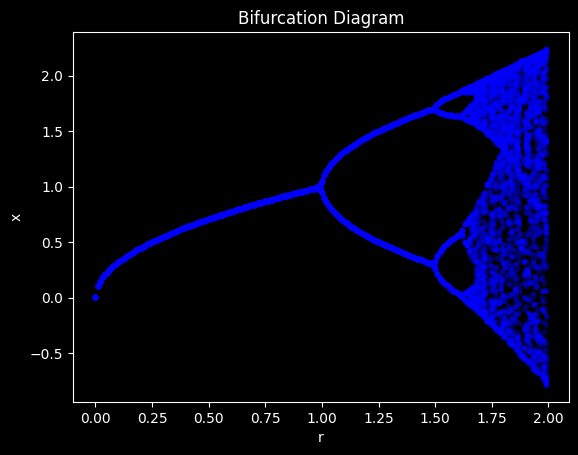

In [4]:
"""
Adapted from Hiroki Sayama (2015); Introduction to the Modeling and Analysis of
Complex Systems; Section 8.4
"""
def initialize():
    global x, result
    x = 0.1
    result = []


def observe():
    global x, result
    result.append(x)


def update():
    global x, result
    x = x + r - x**2


def plot_asymptotic_states():
    initialize()
    for t in range(100): # first 100 steps are discarded
        update()
    for t in range(100): # second 100 steps are collected
        update()
        observe()
    plot([r] * 100, result, "b.", alpha = 0.3)
for r in arange(0, 2, 0.01):
    plot_asymptotic_states()
title("Bifurcation Diagram")
xlabel("r")
ylabel("x")
show()

$\Large Lyapunov \ Exponent$

In [5]:
"""
Adapted from Hiroki Sayama (2015); Introduction to the Modeling and Analysis of
Complex Systems; Section 9.3
"""


def initialize(r):
    # a random value of x in [0, 1) is initialized
    global x, result
    x = np.random.rand()
    result = [logdFdx(x, r)]


def observe(r):
    global x, result
    # the result for the Lyapunov exponent is stored in this list:
    result.append(logdFdx(x, r))


def update(r):
    # Iterate 1 step and update x:
    global x, result
    x = r * x * (1 - x)


def logdFdx(x, r):
    # returns an estimate of the Lyapunov exponent for the logistic map with parameter r and initial value x
    return np.log(abs(r * (1 - 2 * x)))


def lyapunov_exponent(r, n=1000):
    initialize(r)
    # Iterate for n times and return the Lyapunov exponent:
    for _ in range(n):
        update(r)
        observe(r)
    return mean(result)


# Initialize an empty list to store the Lyapunov exponents
lambdas = []
# Define a range of values for r from 1 to 4 with increment 0.01
rvalues = arange(1, 4, 0.01)
for r in rvalues:
    lambdas.append(lyapunov_exponent(r, n=1000))

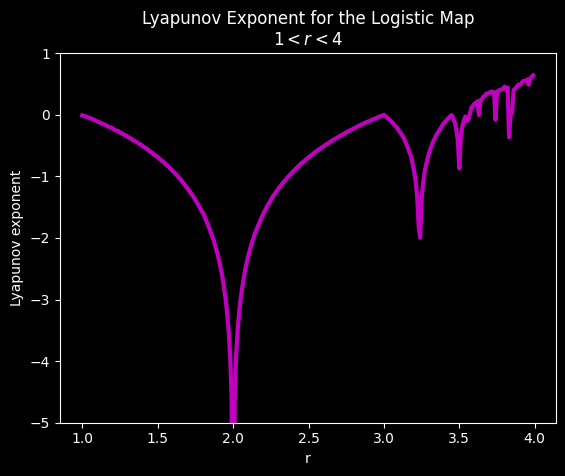

In [6]:
# Plotting the data:
fig, ax = subplots()
ax.plot(rvalues, lambdas, color="m", linewidth=3)
ax.set_ybound(-5, 1)
ax.set_title("Lyapunov Exponent for the Logistic Map\n$1<r<4$")
ax.set_xlabel("r")
ax.set_ylabel("Lyapunov exponent");

In [62]:
# fig.savefig("LyapunovDiagram.jpg")